# Naive Bayes

In [16]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os



In [3]:
df = pd.read_csv('class-knn.csv')

In [4]:
df.head()

,class,x1,x2,x3
0,class1,1,11,51
1,class1,2,11,51
2,class1,3,22,51
3,class1,4,55,52
4,class1,1,12,55


In [5]:
metrics = df.drop('class', axis=1)
target = pd.DataFrame(df, columns = ['class'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(metrics, target, test_size=0.25)

In [7]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 0 0]
 [0 2 0]
 [0 0 1]]
              precision    recall  f1-score   support

      class1       1.00      1.00      1.00         5
      class2       1.00      1.00      1.00         2
      class3       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



# Decision Tree

In [17]:
df = pd.read_csv('iris.csv')

In [18]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
metrics_name= ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
targets_name=['Class']

metrics = pd.DataFrame(df, columns = metrics_name)
target= pd.DataFrame(df,columns = targets_name)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(metrics, target, test_size=0.25)

In [21]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0  9  0]
 [ 0  2  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.95        38
      macro avg       0.94      0.93      0.93        38
   weighted avg       0.96      0.95      0.95        38



In [23]:
ddata = tree.export_graphviz(classifier,
                     feature_names=metrics_name,
                     class_names=metrics_name)
                    

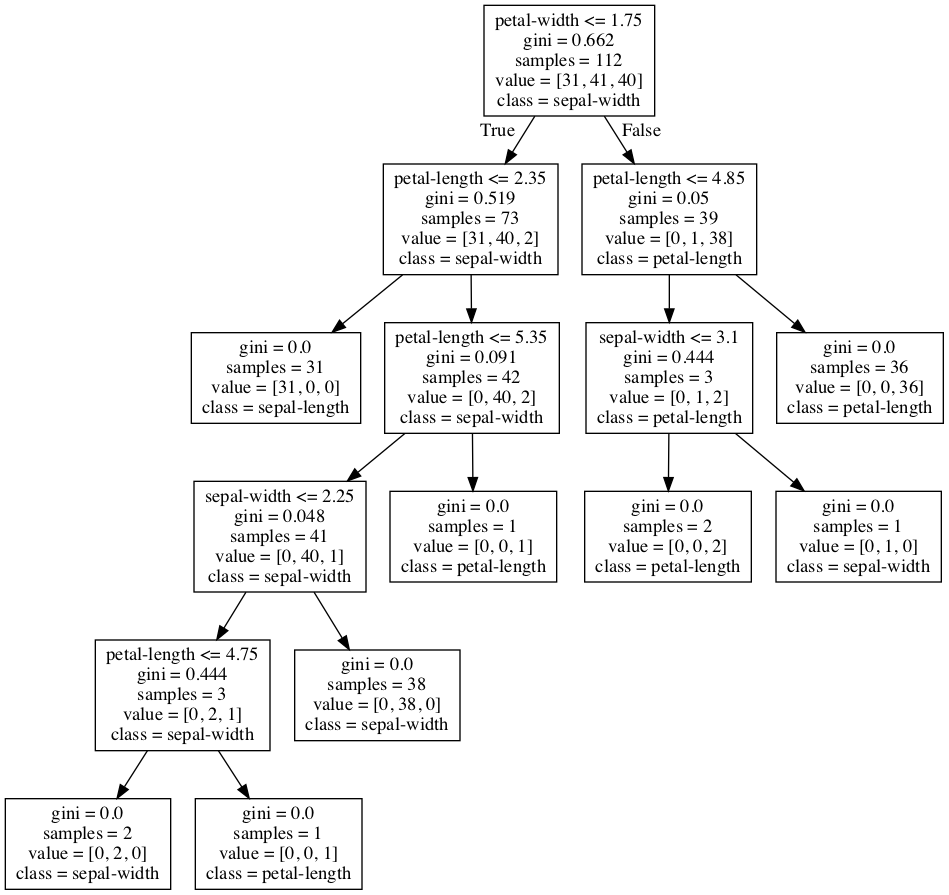

In [25]:
graph=pydotplus.graph_from_dot_data(ddata)
Image(graph.create_png())

In [47]:
!pip install pydotplus

     |████████████████████████████████| 286kB 7.4MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24567 sha256=f74ae9ff6c23a4f6a1ec197554cacaa3e69030155172eae969c34b014493d395
  Stored in directory: /Users/hanmeizhou/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


## Bank Eg

In [26]:
df = pd.read_csv('bank.csv')

In [27]:
df.head()

,age,balance,housing,day,duration,campaign,pdays,previous,deposit
0,59,2343,yes,5,1042,1,-1,0,yes
1,56,45,no,5,1467,1,-1,0,yes
2,41,1270,yes,5,1389,1,-1,0,yes
3,55,2476,yes,5,579,1,-1,0,yes
4,54,184,no,5,673,2,-1,0,yes


In [28]:
metrics_name= ['age', 'balance', 'housing', 'day', 'duration', 'campaign', 'pdays', 'previous']
targets_name=['deposit']
temp = pd.Categorical(df.housing,
               categories=['yes','no'],
               ordered=True
)
new_housing, unique = pd.factorize(temp, sort=True)
df.housing = new_housing

temp = pd.Categorical(df.deposit,
               categories=['yes','no'],
               ordered=True
)
new_deposit, unique = pd.factorize(temp, sort=True)
df.deposit = new_deposit

metrics = pd.DataFrame(df, columns = metrics_name)
targets= pd.DataFrame(df,columns = targets_name)

In [29]:
df.head()

,age,balance,housing,day,duration,campaign,pdays,previous,deposit
0,59,2343,0,5,1042,1,-1,0,0
1,56,45,1,5,1467,1,-1,0,0
2,41,1270,0,5,1389,1,-1,0,0
3,55,2476,0,5,579,1,-1,0,0
4,54,184,1,5,673,2,-1,0,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(metrics, targets, test_size=0.25)

In [31]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 949  363]
 [ 410 1069]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1312
           1       0.75      0.72      0.73      1479

    accuracy                           0.72      2791
   macro avg       0.72      0.72      0.72      2791
weighted avg       0.72      0.72      0.72      2791



In [128]:
ddata = tree.export_graphviz(classifier,
                             feature_names=metrics_name,
                             class_names=metrics_name)
                    

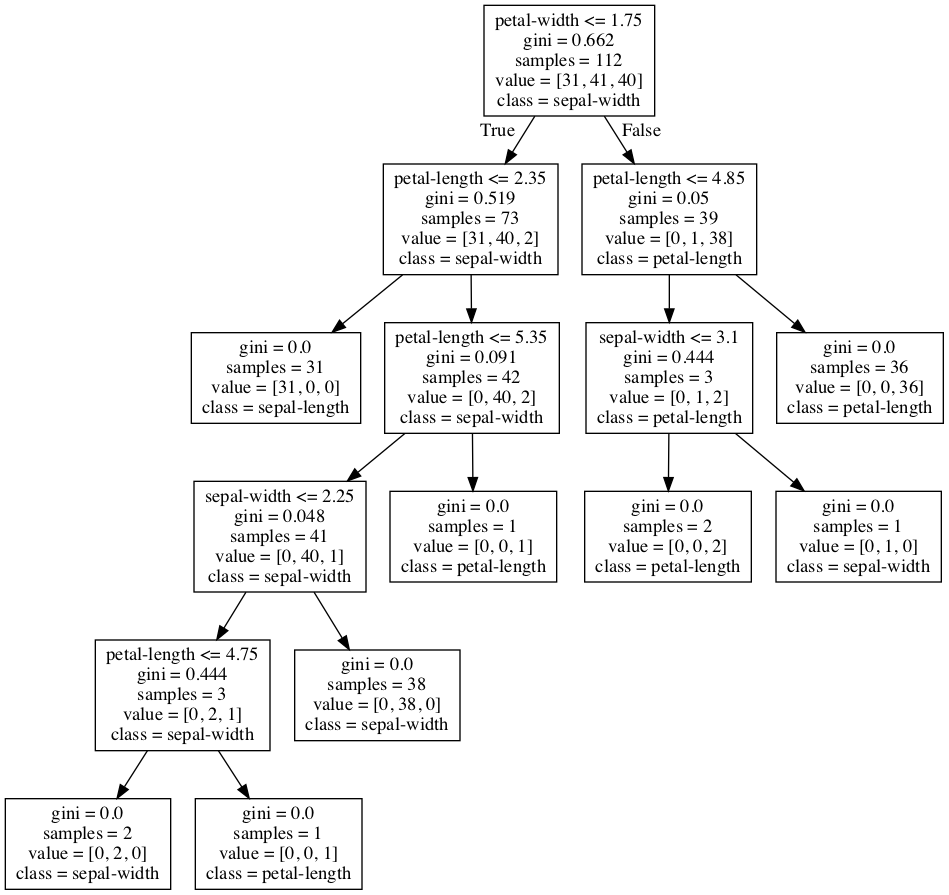

In [33]:
graph = pydotplus.graph_from_dot_data(ddata)
Image(graph.create_png())

In [ ]:
os.environ["PATH"] += os.pathsep + 'Users/hanmeizhou/anaconda3~/opt'